In [68]:
from bs4 import BeautifulSoup
import urllib.request
import urllib
import time
import sys
import re
import math
import os
import random

In [69]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [98]:
def scroll_down(driver, height):
    driver.execute_script("window.scrollTo(0,%s);" % height)
    time.sleep(1)

Google 사이트에서 이미지를 검색하여 수집하는 크롤러 입니다

1 번째 이미지 저장중입니다=======

2 번째 이미지 저장중입니다=======

3 번째 이미지 저장중입니다=======

4 번째 이미지 저장중입니다=======

5 번째 이미지 저장중입니다=======
200.0 번째 이미지 스크롤 중입니다=======

6 번째 이미지 저장중입니다=======

7 번째 이미지 저장중입니다=======

8 번째 이미지 저장중입니다=======

9 번째 이미지 저장중입니다=======

10 번째 이미지 저장중입니다=======
400.0 번째 이미지 스크롤 중입니다=======

11 번째 이미지 저장중입니다=======

12 번째 이미지 저장중입니다=======

13 번째 이미지 저장중입니다=======

14 번째 이미지 저장중입니다=======

15 번째 이미지 저장중입니다=======
600.0 번째 이미지 스크롤 중입니다=======

16 번째 이미지 저장중입니다=======

17 번째 이미지 저장중입니다=======

18 번째 이미지 저장중입니다=======

19 번째 이미지 저장중입니다=======

20 번째 이미지 저장중입니다=======
800.0 번째 이미지 스크롤 중입니다=======

21 번째 이미지 저장중입니다=======

22 번째 이미지 저장중입니다=======

23 번째 이미지 저장중입니다=======

24 번째 이미지 저장중입니다=======

25 번째 이미지 저장중입니다=======
1000.0 번째 이미지 스크롤 중입니다=======

26 번째 이미지 저장중입니다=======

27 번째 이미지 저장중입니다=======

28 번째 이미지 저장중입니다=======

29 번째 이미지 저장중입니다=======

30 번째 이미지 저장중입니다=======
1200.0 번째 이미지 스크롤 중입니다=======

31 번째 이미지 저장중입니다=======

32 번째 이미지 저장중입니다=====
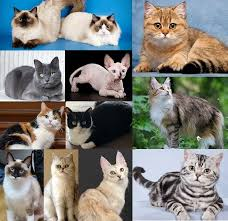
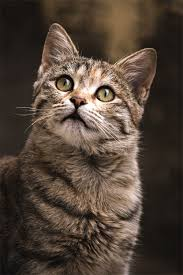
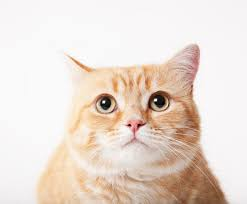
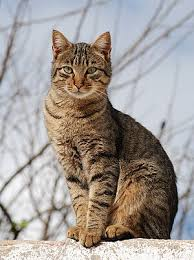
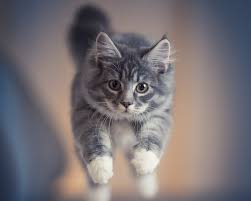
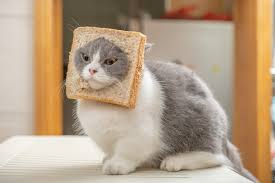
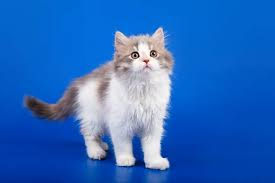
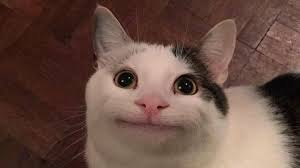
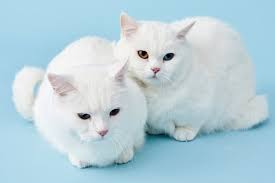
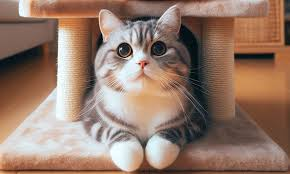
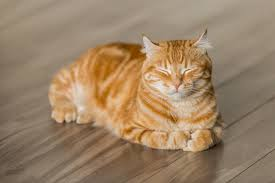
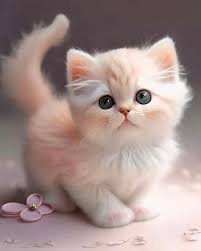
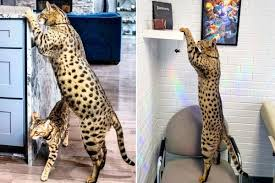
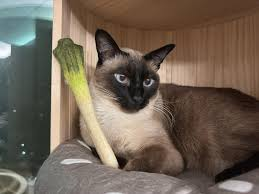
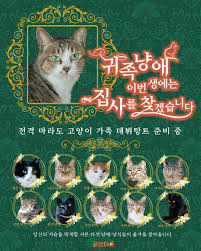
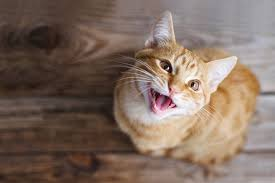
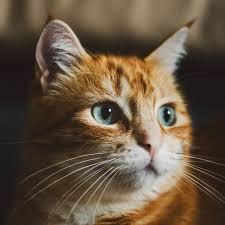
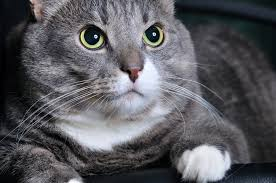
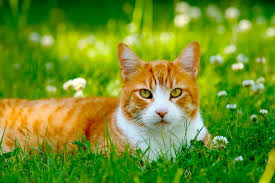
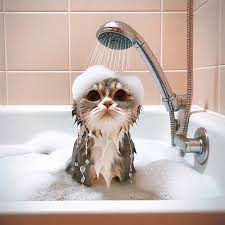
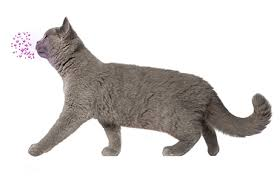
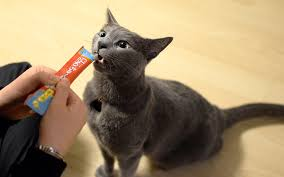
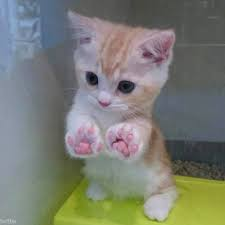
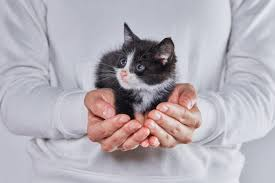
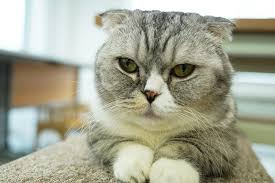
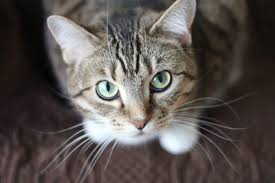
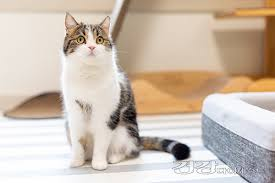
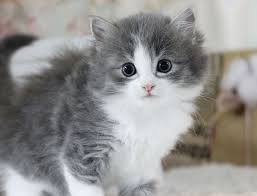
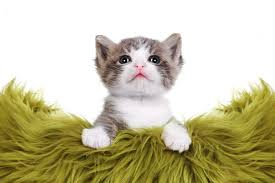
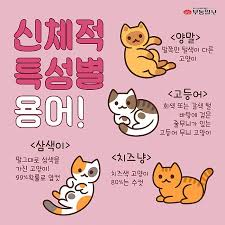
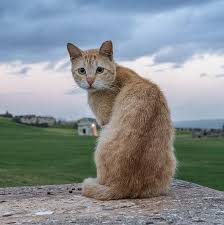
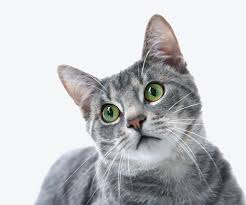
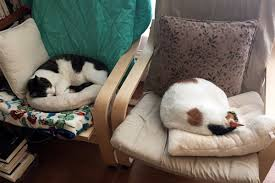
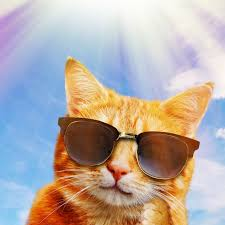
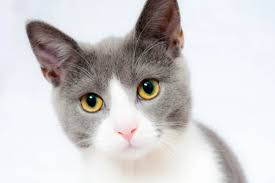
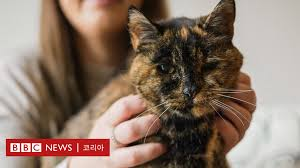
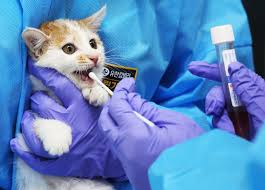
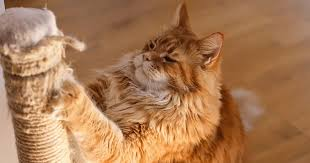
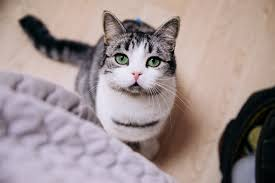
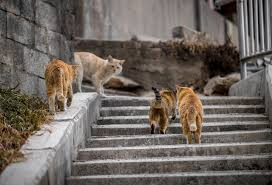
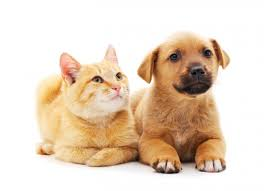
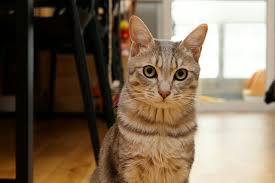
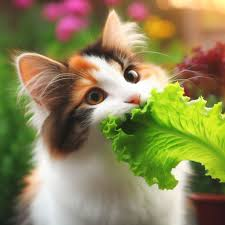
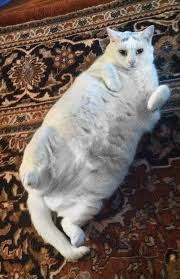
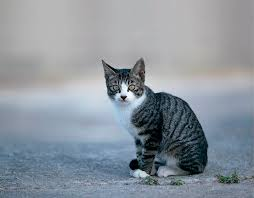
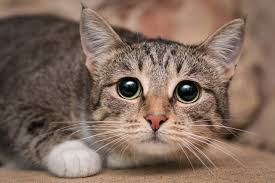
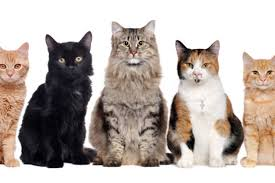
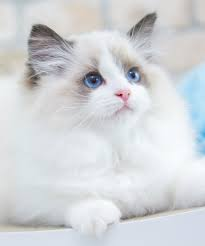
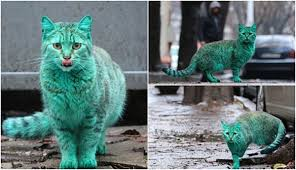
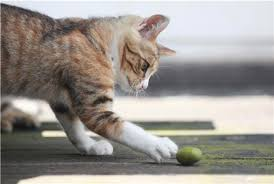

In [105]:
chrome_options = Options()
chrome_options.add_experimental_option("detach", True)
driver = webdriver.Chrome(options=chrome_options)
driver.implicitly_wait(3)

s_time = time.time( ) 

driver.get("https://google.com/")
# time.sleep(2)

print("=" *100)
print("Google 사이트에서 이미지를 검색하여 수집하는 크롤러 입니다")
print("=" *100)

keyword = '고양이'#input("1. 크롤링할 이미지의 키워드는 무엇입니까?: ")
save_num =  200 #input("2. 크롤링 할 건수는 몇 건입니까?: ")
save_path =  "C:/WorkSpace/Research/crawling/exam/data/google/" #input("3. 파일을 저장할 경로만 쓰세요(예: C:/Users/사용자/Desktop): ")

now = time.localtime()
s = '%04d-%02d-%02d-%02d-%02d-%02d' % (now.tm_year, now.tm_mon, now.tm_mday, now.tm_hour, now.tm_min, now.tm_sec)

os.makedirs(save_path+s+'-'+keyword)
os.chdir(save_path+s+'-'+keyword)
f_result_dir = save_path+s+'-'+keyword


element = driver.find_element(By.CLASS_NAME, 'gLFyf')

# element.click()

element.send_keys(keyword)
element.send_keys(Keys.ENTER)
driver.implicitly_wait(3)
time.sleep(1)

file_no = 0


element = driver.find_element(By.XPATH, '//*[@id="hdtb-sc"]/div/div/div[1]/div/div[2]/a/div')
element.click()

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# 요청 객체 생성


for i in range(0, save_num):
    
    if i % 5 == 0 and i != 0:
        scroll_down(driver, (i/5)*200)
        print("%s 번째 이미지 스크롤 중입니다=======" %((i/5)*200))
        time.sleep(2)
    if i % 10 == 0:
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        # img_src_temp = soup.find('div', 'wIjY0d jFk0f').find_all('img')
        img_src_temp = soup.find('div', 'wIjY0d jFk0f').find_all('img')
        img_src = [i for i in img_src_temp if i['alt'] != '']
        
    request = urllib.request.Request(img_src[i]['src'], headers=headers)

    try:
        # 요청을 통해 응답 얻기
        with urllib.request.urlopen(request) as response:
            # 응답 내용 읽기
            image_data = response.read()
            extension = ''
            print(img_src[i]['src'])
            if (img_src[i]['src'].startswith('data:image/jpeg')):
                extension = '.jpg'
            elif (img_src[i]['src'].startswith('data:image/png')):
                extension = '.png'
            elif (img_src[i]['src'].startswith('data:image/gif')):
                extension = '.gif'
            else:
                extension = '.jpg'
            # 파일로 저장
            with open(f"{file_no}{extension}", 'wb') as file:
                file.write(image_data)

    except urllib.error.HTTPError as e: 
        print(f"HTTP 오류 발생: {e.code} - {e.reason}")
    except urllib.error.URLError as e:
        print(f"URL 오류 발생: {e.reason}")
    
    

    file_no += 1                
    time.sleep(0.5)      
    print("%s 번째 이미지 저장중입니다=======" %file_no)
    

       
# Step 6. 요약 정보를 출력합니다                
e_time = time.time( )
t_time = e_time - s_time

store_cnt = file_no -1

print("=" *70)
print("총 소요시간은 %s 초 입니다 " %round(t_time,1))
print("총 저장 건수는 %s 건 입니다 " %file_no)
print("파일 저장 경로: %s 입니다" %f_result_dir)
print("=" *70)

driver.close()
